# Into to Data Science Mini-project

## Preprocessing

In [61]:
# Import data from the csv file called "complete_laptop_data0.csv" and create a dataframe called "df"

import pandas as pd

df = pd.read_csv("complete_laptop_data0.csv")

# Print the first 5 rows of the dataframe
df.head()


,id,link,name,user rating,Price,Sales Package,Model Number,Part Number,Model Name,Series,...,Security Chip,Inbuilt 4G LTE,Cloud Storage,S-video,Dock Port,Firewire Port,RJ11,Read/Write Speed,EMMC Storage Capacity,Optane Memory
0,0,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 17 Core i9 12th Gen - (32 ...,5.0,"?2,34,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G733ZW-LL139WS,90NR08G2-M007S0,G733ZW-LL139WS,ROG Strix SCAR 17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.flipkart.com/asus-rog-strix-scar-1...,ASUS ROG Strix SCAR 15 Core i9 12th Gen - (32 ...,NaN,"?2,29,990","Laptop, Power Adaptor, User Guide, Warranty Do...",G533ZW-LN136WS,90NR0872-M007L0,G533ZW-LN136WS,ROG Strix SCAR 15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.flipkart.com/hp-victus-ryzen-7-oct...,HP Victus Ryzen 7 Octa Core 5800H - (16 GB/512...,NaN,"?1,04,091","Laptop, battery, adapter, cables and user manuals",16-e0351AX,552X1PA#ACJ,16-e0351AX,Victus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.flipkart.com/lenovo-ideapad-gaming...,Lenovo IdeaPad Gaming 3i Ryzen 7 Octa Core R7-...,NaN,"?87,717","Laptop, Power Adaptor, User Guide, Warranty Do...",15ACH6,82K201RSIN,IdeaPad Gaming 3,IdeaPad Gaming 3i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.flipkart.com/lenovo-yoga-slim-7-co...,Lenovo Yoga Slim 7 Core i5 11th Gen - (16 GB/5...,NaN,"?75,990","Laptop, Adaptor",82A300MBIN,1LS2B001653,Yoga Slim 7 14ITL05,Yoga Slim 7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Functions

In [62]:
import re

# Function to extract the first number from a string
def extract_number(s):
    numbers = re.findall(r'\d+', s)
    return int(numbers[0]) if numbers else 1

# Function to convert "Processor Generation" to a year format
def generation_to_year(row):
    generation = row['Processor Generation']
    brand = row['Processor Brand']

    if isinstance(generation, str):
        if brand == 'AMD':
            if '6th Gen' in generation:
                return 2022
            elif '5th Gen' in generation:
                return 2021
            elif '4th Gen' in generation:
                return 2020
            elif '3rd Gen' in generation:
                return 2019
        elif brand == 'Intel':
            if '12th Gen' in generation:
                return 2021
            elif '11th Gen' in generation:
                return 2020
            elif '10th Gen' in generation:
                return 2019
    return None

# Function to convert capacities to MB
def convert_to_gb(capacity):
    if isinstance(capacity, float):
        return capacity
    if capacity.endswith('TB'):
        return int(capacity.replace('TB', '')) * 1024
    elif capacity.endswith('GB'):
        return int(capacity.replace('GB', ''))
    elif capacity.endswith('MB'):
        return round(int(capacity.replace('MB', '')) / 1024, 2)  # Convert from MB to GB and round to 2 decimal places
    else:
        return None
    
# Function to calculate total pixels in "Screen Resolution" column
def calculate_total_pixels(resolution):
    matches = re.findall(r'\d+', resolution)
    if len(matches) >= 2:
        total_pixels = int(matches[0]) * int(matches[-1])
        return total_pixels
    else:
        return None


### Field modifications

In [63]:
# Modify/create the following columns and delete the rest (original column name in brackets):
# name (name): keep original
# brand (name): take the first word of the name column
# price (Price): keep original, remove "?" from the start of the field and remove ","
# processor brand (Processor Brand): keep original (remove entries with other than Intel or AMD)
# processor number (Processor Name):  modify from i3, i5, i7... and Ryzen 3, Ryzen 5, Ryzen 7... to 3, 5, 7...
# processor year (Processor Generation): convert to a year format
# processor clock speed (Clock Speed): only take the first number part of the field
# processor core count (Number of Cores): keep original
# SSD (SSD): modify from Yes/No to true/false
# drive capacity (SSD Capacity/HDD Capacity): combine fields "SSD Capacity" and "HDD Capacity" into one field, if field SSD is true, only take the SSD capacity, if SSD is false, only take the HDD capacity, convert to GB
# RAM (RAM): convert to GB
# GPU memory (Dedicated Graphic Memory Capacity): convert to GB
# screen size (Screen Size): only take the last number part of the field
# pixel count (Screen Resolution): keep original
# weight (Weight): take only the number part of the field
# speakers (Speakers): true/false (if null, false, otherwise true)
# touchscreen (Touchscreen): modify to true/false
# microphone (Internal Mic): true/false (if null, false, otherwise true)
# webcam (Web Camera): true/false (if null, false, otherwise true)
# pixel count (Screen Resolution): calculate total pixels by multiplying the first two numbers

# Create a new dataframe called "df2" with the modified columns
df2 = df.copy()

# brand (name): take the first word of the name column
df2["brand"] = df2["name"].str.split(" ").str[0]
# price (Price): keep original, remove "?" from the start of the field and remove ","
df2["price"] = df2["Price"].str.replace("?", "").str.replace(",", "")
# processor brand (Processor Brand): keep original (remove entries with other than Intel or AMD)
df2 = df2[df2["Processor Brand"].isin(["Intel", "AMD"])]
df2["processor brand"] = df2["Processor Brand"]
# processor number (Processor Name): modify from i3, i5, i7... and Ryzen 3, Ryzen 5, Ryzen 7... to 3, 5, 7...
df2["processor number"] = df2["Processor Name"].apply(extract_number)
# processor year (Processor Generation): convert to a year format
df2["processor year"] = df2.apply(generation_to_year, axis=1)
# processor clock speed (Clock Speed): only take the first number part of the field
df2["processor clock speed"] = df2["Clock Speed"].str.extract(r"([-+]?\d*\.\d+|\d+)")
# processor core count (Number of Cores): keep original
df2["processor core count"] = df2["Number of Cores"]
# SSD (SSD): modify from Yes/No to true/false
df2["SSD"] = df2["SSD"].str.replace(" ", "").str.replace("Yes", "True").str.replace("No", "False")
# drive capacity (SSD Capacity/HDD Capacity): combine fields "SSD Capacity" and "HDD Capacity" into one field, if field SSD is true, only take the SSD capacity, if SSD is false, only take the HDD capacity, convert to GB
df2["drive capacity"] = df2["SSD Capacity"].combine_first(df2["HDD Capacity"])
df2["drive capacity"] = df2["drive capacity"].apply(convert_to_gb)
# RAM (RAM): convert to GB
df2["RAM"] = df2["RAM"].apply(convert_to_gb)
# GPU memory capacity (Dedicated Graphic Memory Capacity): convert to GB
df2["GPU memory"] = df2["Dedicated Graphic Memory Capacity"].apply(convert_to_gb)
# screen size (Screen Size): only take the last number part of the field
df2["screen size"] = df2["Screen Size"].str.split(" ").str[2].str.replace("(","")
# weight (Weight): take only the number part of the field
df2["weight"] = df2["Weight"].str.extract(r"([-+]?\d*\.\d+|\d+)")
# speakers (Speakers): true/false (if null, false, otherwise true)
df2["speakers"] = df2["Speakers"].isnull() == False
# touchscreen (Touchscreen): modify to true/false
df2["touchscreen"] = df2["Touchscreen"].str.replace(" ", "").isnull() == False
# microphone (Internal Mic): true/false (if null, false, otherwise true)
df2["microphone"] = df2["Internal Mic"].isnull() == False
# webcam (Web Camera): true/false (if null, false, otherwise true)
df2["webcam"] = df2["Web Camera"].isnull() == False
# pixel count (Screen Resolution): calculate total pixels by multiplying the first two numbers
df2["pixel count"] = df2["Screen Resolution"].apply(calculate_total_pixels)


df2 = df2[["brand", "price", "processor brand", "processor number", "processor year", "processor clock speed", "processor core count", "SSD", "drive capacity", "RAM", "GPU memory", "screen size", "pixel count", "weight", "speakers", "touchscreen", "microphone", "webcam"]]

df2.head()


,brand,price,processor brand,processor number,processor year,processor clock speed,processor core count,SSD,drive capacity,RAM,GPU memory,screen size,pixel count,weight,speakers,touchscreen,microphone,webcam
0,ASUS,234990,Intel,9,2021.0,2.5,14.0,True,1024.0,32,8.0,17.3,3686400.0,2.90,True,True,True,False
1,ASUS,229990,Intel,9,2021.0,2.5,14.0,True,1024.0,32,8.0,15.6,3686400.0,2.30,True,True,True,False
2,HP,104091,AMD,7,NaN,3.2,8.0,True,512.0,16,4.0,16.1,2073600.0,2.48,True,True,True,True
3,Lenovo,87717,AMD,7,2021.0,3.2,8.0,True,512.0,16,4.0,15.6,2073600.0,2.25,True,True,True,True
4,Lenovo,75990,Intel,5,2020.0,NaN,NaN,True,512.0,16,NaN,14,NaN,NaN,True,True,True,True


### Writing to a file

In [64]:
# Write df2 to a csv file called "preprocessed_laptop_data.csv"

df2.to_csv("preprocessed_laptop_data.csv", index=False)


### One-hot encoding "brand" and "processor brand" fields.

In [65]:
# Show how many unique values are in column "brand" and "processor brand"

print(df2["brand"].nunique())
print(df2["processor brand"].nunique())

# One-hot encode the column "brand" and "processor brand" and create a new dataframe called "df3" with the one-hot encoded columns

df3 = pd.get_dummies(df2, columns=["brand", "processor brand"])

df3.head()


15
2


,price,processor number,processor year,processor clock speed,processor core count,SSD,drive capacity,RAM,GPU memory,screen size,...,brand_MSI,brand_Mi,brand_Nokia,brand_RedmiBook,brand_Vaio,brand_acer,brand_lenovo,brand_realme,processor brand_AMD,processor brand_Intel
0,234990,9,2021.0,2.5,14.0,True,1024.0,32,8.0,17.3,...,False,False,False,False,False,False,False,False,False,True
1,229990,9,2021.0,2.5,14.0,True,1024.0,32,8.0,15.6,...,False,False,False,False,False,False,False,False,False,True
2,104091,7,NaN,3.2,8.0,True,512.0,16,4.0,16.1,...,False,False,False,False,False,False,False,False,True,False
3,87717,7,2021.0,3.2,8.0,True,512.0,16,4.0,15.6,...,False,False,False,False,False,False,False,False,True,False
4,75990,5,2020.0,NaN,NaN,True,512.0,16,NaN,14,...,False,False,False,False,False,False,False,False,False,True


### Converting False/True to 0/1

In [66]:
# Convert all False values to 0 and all True values to 1 in df3

df3 = df3.replace({'True': 1, 'False': 0})
df3 = df3 * 1

df3.head()


,price,processor number,processor year,processor clock speed,processor core count,SSD,drive capacity,RAM,GPU memory,screen size,...,brand_MSI,brand_Mi,brand_Nokia,brand_RedmiBook,brand_Vaio,brand_acer,brand_lenovo,brand_realme,processor brand_AMD,processor brand_Intel
0,234990,9,2021.0,2.5,14.0,1,1024.0,32,8.0,17.3,...,0,0,0,0,0,0,0,0,0,1
1,229990,9,2021.0,2.5,14.0,1,1024.0,32,8.0,15.6,...,0,0,0,0,0,0,0,0,0,1
2,104091,7,NaN,3.2,8.0,1,512.0,16,4.0,16.1,...,0,0,0,0,0,0,0,0,1,0
3,87717,7,2021.0,3.2,8.0,1,512.0,16,4.0,15.6,...,0,0,0,0,0,0,0,0,1,0
4,75990,5,2020.0,NaN,NaN,1,512.0,16,NaN,14,...,0,0,0,0,0,0,0,0,0,1


### Turn all NaN values to mean values

In [67]:
# Making all values in df3 into float type and turning all NaN values to means of the column in df3

df3 = df3.astype(float)
df3 = df3.fillna(df3.mean())

df3.head()

,price,processor number,processor year,processor clock speed,processor core count,SSD,drive capacity,RAM,GPU memory,screen size,...,brand_MSI,brand_Mi,brand_Nokia,brand_RedmiBook,brand_Vaio,brand_acer,brand_lenovo,brand_realme,processor brand_AMD,processor brand_Intel
0,234990.0,9.0,2021.000000,2.500000,14.000000,1.0,1024.0,32.0,8.00000,17.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,229990.0,9.0,2021.000000,2.500000,14.000000,1.0,1024.0,32.0,8.00000,15.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,104091.0,7.0,2019.812312,3.200000,8.000000,1.0,512.0,16.0,4.00000,16.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,87717.0,7.0,2021.000000,3.200000,8.000000,1.0,512.0,16.0,4.00000,15.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,75990.0,5.0,2020.000000,7.451663,4.664316,1.0,512.0,16.0,4.21529,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# Writing into a new file

df3.to_csv("preprocessed_laptop_data2.csv", index=False)

## ML model modifications

### Splitting train and test data

In [69]:
from sklearn.model_selection import train_test_split

X = df3.drop("price", axis=1)
y = df3["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


### Feature selection

Using RandomForestClassifier to analyze which features are the most important and which are obsolete.

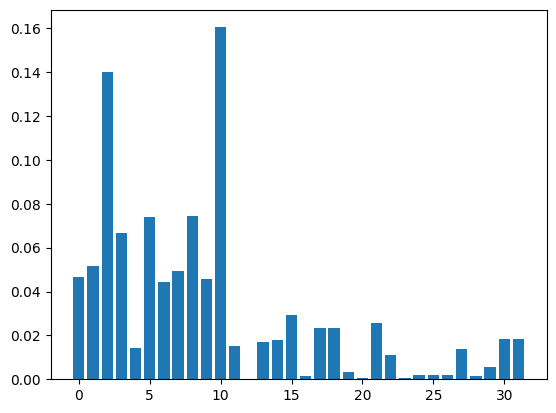

processor number 0.04649933085997517
processor year 0.05164486246676488
processor clock speed 0.1398699552265312
processor core count 0.06680333592757533
drive capacity 0.0740129901252421
RAM 0.04445048424820668
GPU memory 0.04955609576305564
screen size 0.07423793165044955
pixel count 0.04562976296727159
weight 0.1604348225166571
brand_ASUS 0.029345591206730588
brand_DELL 0.023237235166359317
brand_HP 0.023379269877786064
brand_Lenovo 0.02578472363329449
processor brand_AMD 0.01844082877343579
processor brand_Intel 0.018539844912843294


In [78]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

m = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
m.fit(X_train, y_train)

feature_importances = m.estimator_.feature_importances_
plt.bar([i for i in range(len(feature_importances))], feature_importances)
plt.show()

columns = m.get_support(indices=True)
X_new = X_train.iloc[:,columns]
#print(len(X_new.columns))
#print(X_new.columns)

# Print feature importances of the columns in X_new in order of importance

for i in range(len(X_new.columns)):
    print(X_new.columns[i], feature_importances[columns[i]])

